In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import defaultdict


from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [4]:
pd.options.display.max_columns = 100

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [18]:
df = pd.read_pickle("data/combined_df")

df["RURAL_TYPE"] = df["RURAL_TYPE"].astype('category')

df["RURAL_TYPE"]

GCD    YEAR
10401  2011    430
10402  2011    430
10403  2011    430
10404  2011    430
10405  2011    430
              ... 
62148  2019    330
70317  2019    330
70336  2019    330
70349  2019    330
70813  2019    330
Name: RURAL_TYPE, Length: 2338, dtype: category
Categories (2, int64): [330, 430]

In [19]:
df.describe()

,p_foreign,foreign,p_employ,employ,p_employ_1564,employ_1564,p_employ_sec_I,employ_sec_I,p_employ_sec_II,employ_sec_II,p_employ_sec_III,employ_sec_III,p_pension,pension,p_employ_female,employ_female,p_employ_male,employ_male,p_comm,comm_o,comm_i,fam_avc,pop,p_pop_15,p_pop_65,p_edu_level_2,p_edu_level_3,p_comm_out,hh,hh_av,families,comp,firm,employ_pow
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.00000,2338.000000
mean,6.091022,96.982891,51.629457,749.455518,77.226476,1875.150984,20.555787,61.108640,22.341005,120.912746,57.103067,283.514115,24.118777,349.318221,67.109367,310.974337,78.143358,380.221557,58.782032,435.876818,208.133020,1.663914,1485.201454,13.760864,20.856587,63.524636,6.313003,67.106074,596.273738,2.520218,423.029940,132.799829,147.68905,551.654833
std,5.711222,169.788871,3.926449,570.281076,4.054530,7394.757604,14.327958,54.626449,15.023136,191.550957,17.181191,409.237150,5.141434,276.418933,7.236289,245.089133,5.436210,283.198249,36.531587,284.843644,326.025404,0.140583,1197.354048,2.496022,4.181533,4.797015,2.333513,14.054881,505.379977,0.275882,339.934812,113.449010,129.99727,677.676719
min,0.120000,1.000000,34.720000,19.000000,53.190000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.070000,8.000000,36.700000,9.000000,50.000000,7.000000,3.850000,10.000000,0.000000,1.320000,42.000000,5.400000,9.600000,44.200000,0.000000,11.600000,17.000000,1.780000,13.000000,1.000000,1.00000,1.000000
25%,2.640000,24.000000,49.062500,371.000000,74.532500,427.000000,9.060000,21.000000,11.262500,18.000000,45.402500,69.000000,20.202500,172.000000,63.250000,148.250000,74.687500,190.250000,35.520000,229.000000,39.000000,1.560000,734.250000,12.000000,17.900000,60.500000,4.700000,60.200000,286.000000,2.320000,210.000000,62.000000,68.00000,168.250000
50%,4.550000,49.000000,51.610000,594.000000,77.605000,740.000000,18.180000,47.000000,19.590000,52.000000,56.245000,144.000000,23.855000,277.500000,67.910000,244.000000,78.535000,302.000000,48.075000,380.000000,92.000000,1.650000,1151.500000,13.800000,20.700000,63.900000,6.100000,70.000000,465.000000,2.500000,330.000000,102.000000,112.00000,315.500000
75%,7.970000,97.750000,54.240000,939.750000,80.087500,1222.750000,29.900000,85.000000,29.500000,140.000000,69.655000,300.750000,27.887500,433.750000,72.027500,395.000000,82.147500,483.750000,71.257500,578.750000,232.000000,1.750000,1817.750000,15.400000,23.600000,66.900000,7.600000,76.800000,734.750000,2.690000,526.000000,165.000000,180.00000,647.750000
max,64.630000,2396.000000,66.670000,3678.000000,88.370000,153188.000000,100.000000,330.000000,89.750000,2242.000000,100.000000,3172.000000,42.730000,1976.000000,83.030000,1624.000000,93.750000,1732.000000,255.360000,1878.000000,3238.000000,2.470000,12900.000000,24.200000,39.300000,76.600000,17.400000,96.200000,5735.000000,4.080000,3487.000000,1438.000000,1690.00000,7969.000000


In [20]:
df["commute_balance"] = df["comm_i"] - df["comm_o"]
df["commute_balance"].describe()


count    2338.000000
mean     -227.743798
std       303.995335
min     -1195.000000
25%      -372.000000
50%      -229.000000
75%      -118.000000
max      2249.000000
Name: commute_balance, dtype: float64

In [21]:
df["attract_commute"] = df["commute_balance"] > 0
df["attract_commute"].value_counts()



False    2094
True      244
Name: attract_commute, dtype: int64

In [22]:
list(df.columns)

['NAME',
 'RURAL_TYPE',
 'p_foreign',
 'foreign',
 'p_for_EU',
 'for_EU',
 'p_employ',
 'employ',
 'p_employ_1564',
 'employ_1564',
 'p_employ_sec_I',
 'employ_sec_I',
 'p_employ_sec_II',
 'employ_sec_II',
 'p_employ_sec_III',
 'employ_sec_III',
 'p_pension',
 'pension',
 'p_employ_female',
 'employ_female',
 'p_employ_male',
 'employ_male',
 'p_comm',
 'comm_o',
 'comm_i',
 'fam_avc',
 'pop',
 'p_pop_15',
 'p_pop_65',
 'p_edu_level_2',
 'p_edu_level_3',
 'p_comm_out',
 'hh',
 'hh_av',
 'families',
 'comp',
 'firm',
 'employ_pow',
 'commute_balance',
 'attract_commute']

In [23]:
y = df["attract_commute"].values.astype("uint8")
np.bincount(y)

array([2094,  244])

In [24]:
possible_columns = ['RURAL_TYPE', 'p_foreign', 'foreign', 'p_for_EU', 'for_EU',
                     'p_employ', 'employ', 'p_employ_1564', 'employ_1564', 'p_employ_sec_I',
                     'employ_sec_I', 'p_employ_sec_II', 'employ_sec_II', 'p_employ_sec_III',
                     'employ_sec_III', 'p_pension', 'pension', 'p_employ_female',
                     'employ_female', 'p_employ_male', 'employ_male',
                     'fam_avc', 'pop', 'p_pop_15', 'p_pop_65', 'p_edu_level_2',
                     'p_edu_level_3', 'hh', 'hh_av', 'families', 'comp',
                     'firm', 'employ_pow']
    

#X[np.where(X == "-")] = 0.0
#X= X.astype("double")

In [25]:
def run_LDA(X, y):
    lda = LDA(n_components=1)
    lda_object = lda.fit(X, y)
    score = lda_object.score(X, y)

    return score, lda_object

In [60]:
max_score = 0.0
best_pair = None
best_lda = None
best_X = None

pair_scores = {}

for columns in set(permutations(possible_columns, 3))#combinations_with_replacement(possible_columns, 3):
    X = df[set(columns)].values

    X[np.where(X == "-")] = 0.0
    X = X.astype("double")

    X = normalize(X, norm="max", axis=0)

    score, lda_object = run_LDA(X, y)

    pair_scores[columns] = score

    if score > max_score:
        max_score = score
        best_pair = columns
        best_lda = lda_object
        best_X = X

        print(f"new best pair {' - '.join(columns)} with score {score}")

KeyError: "None of [Index(['RURAL_TYPE'], dtype='object')] are in the [columns]"

In [37]:
best_pair

('employ_sec_III', 'employ_female')

In [51]:
# calculate random score as you always get a decent score by chance due to the high class imbalance

number_of_class_members = np.bincount(y)
random_score = max(number_of_class_members) / sum(number_of_class_members)

print(f"random score = {random_score}")

random score = 0.8956372968349017


In [55]:
print()
for key, score in sorted(pair_scores.items(), key=lambda item: item[1], reverse=True):
    norm_score = score - random_score
    print(f"{key} -> {norm_score}")


('employ_sec_III', 'employ_female') -> 0.04063301967493582
('employ', 'employ_sec_III') -> 0.03678357570573132
('employ_sec_III', 'employ_male') -> 0.036355859709153115
('pop', 'employ_pow') -> 0.03336184773310513
('families', 'employ_pow') -> 0.03336184773310513
('employ_sec_III', 'pension') -> 0.031650983746792094
('employ_sec_III', 'families') -> 0.029940119760478945
('employ_sec_III', 'pop') -> 0.02951240376390074
('employ_sec_III', 'hh') -> 0.028656971770744222
('hh', 'employ_pow') -> 0.026090675791274553
('employ_sec_I', 'employ_sec_III') -> 0.022668947818648366
('employ_sec_II', 'employ_female') -> 0.018819503849443975
('employ_sec_II', 'employ_male') -> 0.018819503849443975
('employ_female', 'employ_pow') -> 0.01839178785286566
('employ', 'employ_sec_II') -> 0.017964071856287345
('employ_sec_III', 'p_employ_female') -> 0.01753635585970914
('employ_sec_I', 'employ_sec_II') -> 0.01668092386655251
('families', 'firm') -> 0.01668092386655251
('employ_sec_II', 'families') -> 0.0162

In [58]:


feature_score_sum = defaultdict(float)
feature_score_count = defaultdict(int)

for keys, score in pair_scores.items():
    norm_score = score - random_score

    for key in keys:
        feature_score_sum[key] += norm_score
        feature_score_count[key] += 1
   


feature_avg_score = {key: sum / feature_score_count[key] for key, sum in feature_score_sum.items()}

for key, avg_score in sorted(feature_avg_score.items(), key=lambda item: item[1], reverse=True):
    print(f"{key} -> {avg_score}")




employ_sec_III -> 0.011019976853016618
employ_sec_II -> 0.009699089216524888
employ_pow -> 0.0031198107985708733
employ_male -> 0.0019876213958637027
p_employ_sec_I -> 0.000993810697931853
pension -> 0.0009309112866703067
employ_female -> 0.0009183314044180099
families -> 0.0005409349368489344
pop -> 0.00047803552558742734
employ_sec_I -> 0.00027675740955061893
employ -> 7.547929351376806e-05
p_employ_female -> -0.00016353846927997663
p_employ_sec_II -> -0.0003396568208121979
p_employ_male -> -0.00035223670306452415
hh -> -0.00037739646756912437
for_EU -> -0.00041513611432601494
firm -> -0.0004277159965783281
p_employ_sec_III -> -0.0007547929351381573
p_edu_level_3 -> -0.0008176923463996841
p_employ -> -0.0008805917576611879
p_pension -> -0.0009434911689226983
hh_av -> -0.0009686509334272985
foreign -> -0.001094449755950352
fam_avc -> -0.0012076686962210301
RURAL_TYPE -> -0.0012076686962210334
p_pop_15 -> -0.0012328284607256402
employ_1564 -> -0.001245408342977937
p_edu_level_2 -> -0.0

/tmp/ipykernel_1388/2436910270.py:5: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(best_X[y==l,0],


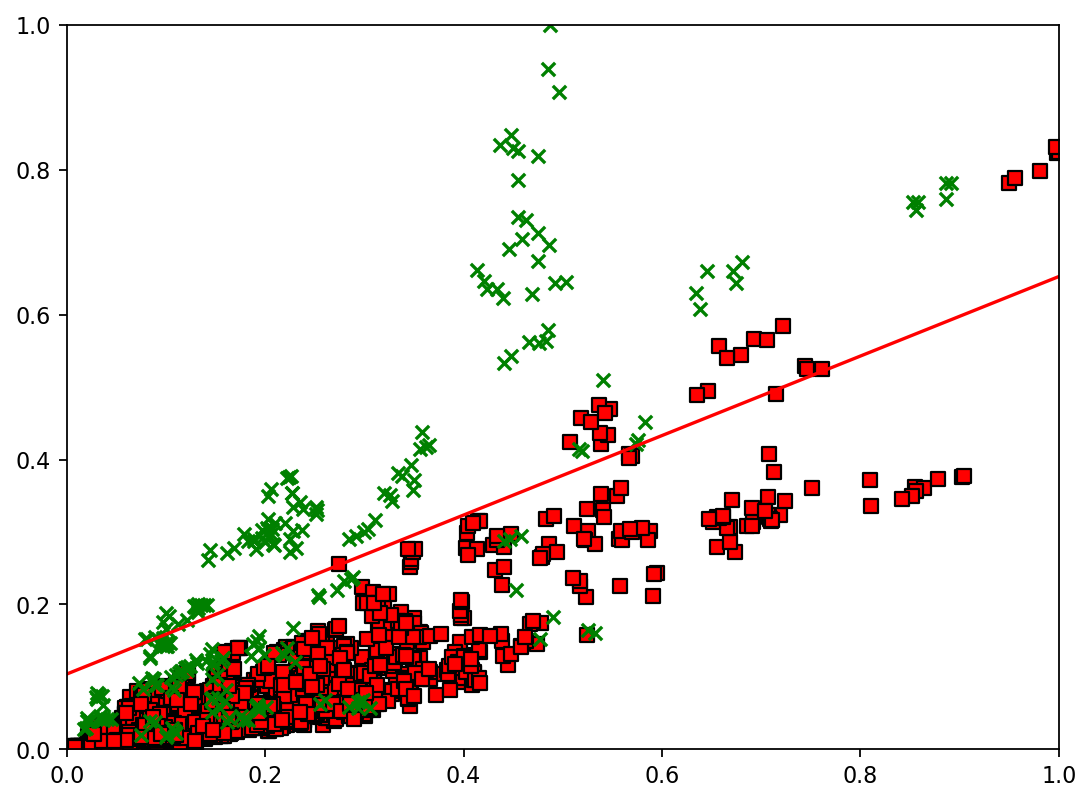

In [40]:
plt.figure(figsize=(8, 6), dpi=160)

# Plot the hyperplanes
for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    plt.scatter(best_X[y==l,0],
                best_X[y==l,1],
                c=c, marker=m, label=l,edgecolors='black')

x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])

for i, c in enumerate(['r']):
    b, w1, w2 = best_lda.intercept_[i],best_lda.coef_[i][0], best_lda.coef_[i][1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c=c)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

<Figure size 2400x1800 with 0 Axes>

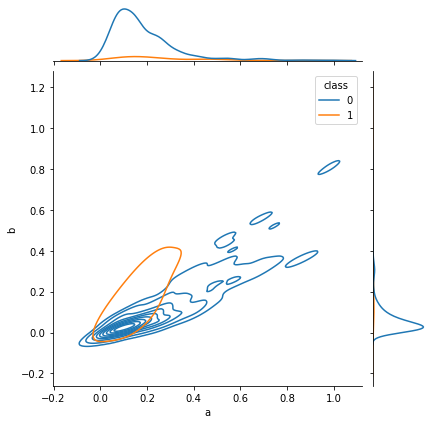

In [41]:
df = pd.DataFrame.from_dict({"a": best_X[:, 0],
                             "b": best_X[:, 1],
                             "class": y})
plt.figure(figsize = (8,6), dpi=300)

ax = sns.jointplot(data=df, x="a", y="b", hue="class", kind="kde")


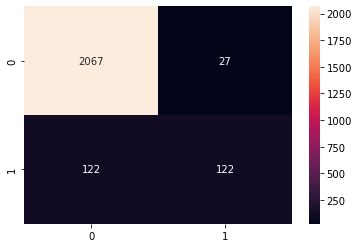

In [42]:
y_pred = best_lda.predict(best_X)

cf_matrix = confusion_matrix(y_true=y, y_pred=y_pred)

DetaFrame_cm = pd.DataFrame(cf_matrix, range(2), range(2))
sns.heatmap(DetaFrame_cm, annot=True, fmt='g')
plt.show()